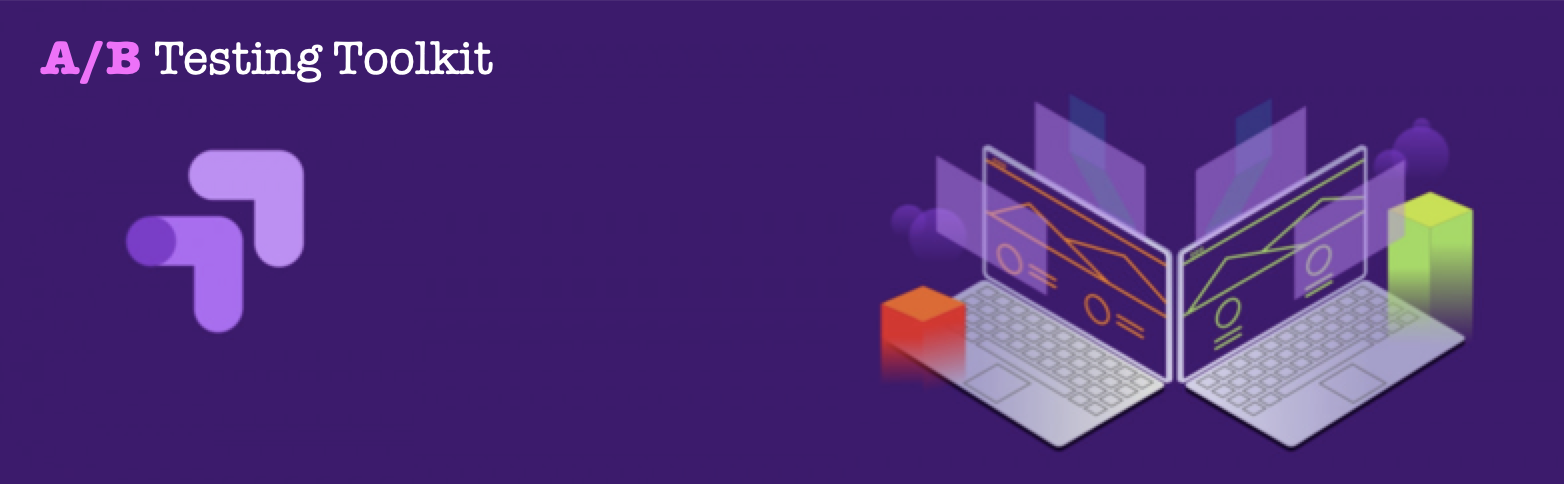

# Experiment Feature Importance

In [126]:
## Import necessary packages for analysis 

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import seaborn as sb
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [69]:
## Turn off warnings

warnings.filterwarnings("ignore")

In [70]:
## Load in data

local = 'tribalism_data.csv'
df = pd.read_csv(local, encoding='unicode_escape')
df.head()

,date,user_experience,session,pvs,exp_metric,rhs_clicks,whatshot_clicks,mostread_clicks,isMobile,browser,operatingSystem,pagePathLevel1,pagePathLevel2,cityId
0,28/02/20,0,2,3,1.500000,0,0,1,True,Chrome,Android,/sport/,/football/,1013376
1,28/02/20,0,28,37,1.321429,0,0,0,True,Safari,iOS,/sport/,/football/,1006668
2,28/02/20,0,1,2,2.000000,0,0,0,True,Safari,iOS,/whats-on/,/food-drink-news/,1006864
3,28/02/20,2,5,6,1.200000,1,0,0,False,Edge,Windows,/sport/,/football/,1006952
4,28/02/20,1,4,11,2.750000,0,0,0,True,Chrome,iOS,/sport/,/football/,1006959


In [71]:
## Rename user_experience labels from numeric to strings

df.loc[(df.user_experience == 0),'user_experience']= 'No filter is applied'
df.loc[(df.user_experience == 1),'user_experience']= 'Filter Applied'
df.loc[(df.user_experience == 2),'user_experience']= 'Whatshot Widget Removed'
df.head()

,date,user_experience,session,pvs,exp_metric,rhs_clicks,whatshot_clicks,mostread_clicks,isMobile,browser,operatingSystem,pagePathLevel1,pagePathLevel2,cityId
0,28/02/20,No filter is applied,2,3,1.500000,0,0,1,True,Chrome,Android,/sport/,/football/,1013376
1,28/02/20,No filter is applied,28,37,1.321429,0,0,0,True,Safari,iOS,/sport/,/football/,1006668
2,28/02/20,No filter is applied,1,2,2.000000,0,0,0,True,Safari,iOS,/whats-on/,/food-drink-news/,1006864
3,28/02/20,Whatshot Widget Removed,5,6,1.200000,1,0,0,False,Edge,Windows,/sport/,/football/,1006952
4,28/02/20,Filter Applied,4,11,2.750000,0,0,0,True,Chrome,iOS,/sport/,/football/,1006959


# Encode feature variables

In [72]:
## Encode all feature variables to be used for subsequent modelling

enconder = LabelEncoder()
user_experience_labels = enconder.fit_transform(df['user_experience'])
user_experience_mappings = {index: label for index, label in 
                  enumerate(enconder.classes_)}

enconder = LabelEncoder()
is_mobile_labels = enconder.fit_transform(df['isMobile'])
is_mobile_mappings = {index: label for index, label in 
                  enumerate(enconder.classes_)}

browser_labels = enconder.fit_transform(df['browser'])
browser_mappings = {index: label for index, label in
                   enumerate(enconder.classes_)}

operatingSystem_labels = enconder.fit_transform(df['operatingSystem'])
operatingSystem_mappings = {index: label for index, label in
                   enumerate(enconder.classes_)}

pagePathLevelOne_labels = enconder.fit_transform(df['pagePathLevel1'])
pagePathLevelOne_mappings = {index: label for index, label in
                   enumerate(enconder.classes_)}

cityId_labels = enconder.fit_transform(df['cityId'])
cityId_mappings = {index: label for index, label in
                   enumerate(enconder.classes_)}

print(user_experience_labels, is_mobile_labels, browser_labels, operatingSystem_labels, pagePathLevelOne_labels, cityId_labels)

[1 1 1 ... 0 1 2] [1 1 1 ... 1 0 0] [ 9 31 31 ... 32 15 25] [ 1 20 20 ... 20 17 17] [221 221 230 ... 221 221 206] [ 5332  2768  2915 ... 10775  3152  2824]


In [73]:
## Append back original data-frame

df['user_experience_labels'] = user_experience_labels
df['is_mobile_labels'] = is_mobile_labels
df['browser_labels'] = browser_labels
df['operatingSystem_labels'] = operatingSystem_labels
df['pagePathLevelOne_labels'] = pagePathLevelOne_labels
df['cityId_labels'] = cityId_labels
df.head()

,date,user_experience,session,pvs,exp_metric,rhs_clicks,whatshot_clicks,mostread_clicks,isMobile,browser,operatingSystem,pagePathLevel1,pagePathLevel2,cityId,user_experience_labels,is_mobile_labels,browser_labels,operatingSystem_labels,pagePathLevelOne_labels,cityId_labels
0,28/02/20,No filter is applied,2,3,1.500000,0,0,1,True,Chrome,Android,/sport/,/football/,1013376,1,1,9,1,221,5332
1,28/02/20,No filter is applied,28,37,1.321429,0,0,0,True,Safari,iOS,/sport/,/football/,1006668,1,1,31,20,221,2768
2,28/02/20,No filter is applied,1,2,2.000000,0,0,0,True,Safari,iOS,/whats-on/,/food-drink-news/,1006864,1,1,31,20,230,2915
3,28/02/20,Whatshot Widget Removed,5,6,1.200000,1,0,0,False,Edge,Windows,/sport/,/football/,1006952,2,0,12,17,221,2983
4,28/02/20,Filter Applied,4,11,2.750000,0,0,0,True,Chrome,iOS,/sport/,/football/,1006959,0,1,9,20,221,2989


# Random forest modelling

In [154]:
## feature and response variables with test-train split

features = df[[ 'user_experience_labels',
                'is_mobile_labels', ## Insert feature variable
                'browser_labels', ## Insert feature variable
                'operatingSystem_labels', ## Insert feature variable
                'pagePathLevelOne_labels', ## Insert feature variable
                'cityId_labels'
]] ## Insert feature variable

target = df.exp_metric ## Input experiment metric/response variable

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25) ## Split into test and training set

In [155]:
## Fit random forest regressor model

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

y_predictions = rfr.predict(X_test)

y_predictions

array([1.01593651, 1.51166667, 1.65555556, ..., 1.        , 1.49722222,
       1.        ])

In [156]:
r_2 = rfr.score(X_test, y_test)
print("The r^2 value for the random forest regressor is:",round(r_2,4),)

The r^2 value for the random forest regressor is: 0.0055


The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

# Feature importance

In [157]:
## Loop through and obtain feature importance for each predictor

for name, importance in zip(features, rf.feature_importances_):
    print(name, "=", importance)

user_experience_labels = 0.0003941880120743835
is_mobile_labels = 0.00030733192967608974
browser_labels = 0.3643646576623611
operatingSystem_labels = 0.13578319617521076
pagePathLevelOne_labels = 0.4616770157503122
cityId_labels = 0.03747361047036543


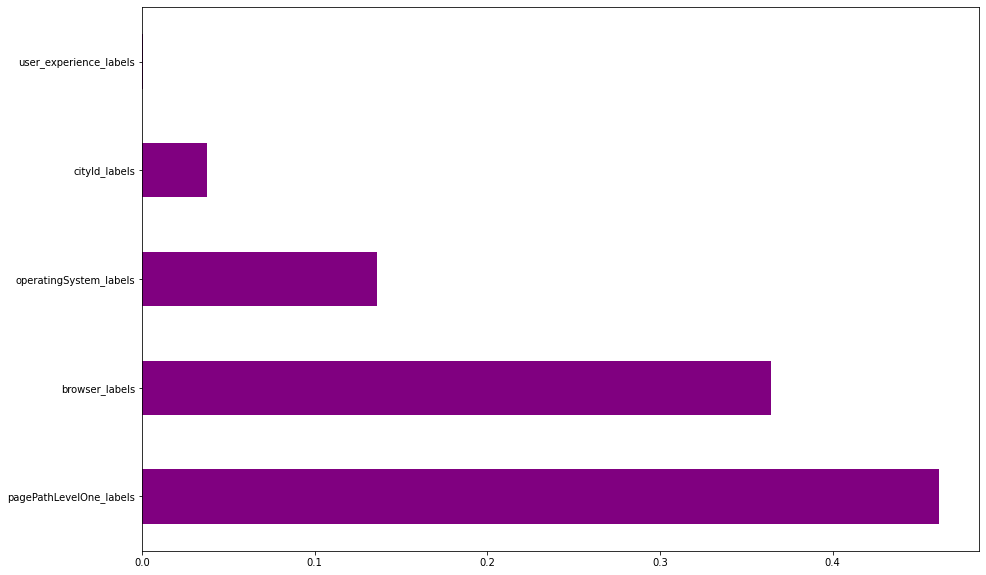

In [158]:
## Plot feature importance in horizontal barchart

plt.figure(figsize=(15,10))
feat_importances = pd.Series(rf.feature_importances_, index=features.columns)
feat_importances.nlargest().plot(kind='barh', color = 'purple')